In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors
# import du garbage collector
import gc
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from collections import defaultdict

# Chargement du fichier PHD_3 du jeu de données au format CSV

In [2]:
try:
    df_theses = pd.read_csv('PhD_v3.csv', sep=',', encoding='utf-8', low_memory=False)
except FileNotFoundError as fnf:
    print("Fichier non trouvé: {} ".format(fnf))
except pd.errors.EmptyDataError as ede:
    print("Aucune données: {}".format(ede))
except pd.errors.ParserError as pe:
    print("Erreur au parsing: {}".format(pe))
except Exception as e:
    print("Un exception a eu lieu au chargement du fichier: {}".format(e) )

In [3]:
# 1° colonne inutile
df_theses = df_theses.drop(df_theses.columns[0], axis=1)
#renommage
df_theses = df_theses.rename(columns={'Discipline_prÃ©di': 'Discipline prédite'})
df_theses = df_theses.rename(columns={'etablissement_rec': 'Etablissement'})
df_theses = df_theses.rename(columns={'Langue_rec': 'Langue'})
df_theses = df_theses.rename(columns={'Year': 'Année'})

# EXERCICE 1

## évolution quantitative des différentes disciplines sur la période 1985-2018

### stacked area plot

In [4]:
df_theses_1985_2018 = df_theses[ (df_theses ["Année"] >= 1985) & (df_theses ["Année"] <= 2018) ]


In [5]:
df_theses_1985_2018_grouped = df_theses_1985_2018.groupby(['Discipline prédite', 'Année'])['Auteur'].count()

In [6]:
df_theses_1985_2018_grouped

Discipline prédite       Année 
Biologie                 1985.0     695
                         1986.0     967
                         1987.0    1716
                         1988.0    1815
                         1989.0    1649
                                   ... 
Sciences de l'education  2014.0      40
                         2015.0      35
                         2016.0      52
                         2017.0      44
                         2018.0      45
Name: Auteur, Length: 505, dtype: int64

In [7]:
df_theses_1985_2018_ungrouped = df_theses_1985_2018_grouped.reset_index()

In [8]:
df_theses_1985_2018_ungrouped=df_theses_1985_2018_ungrouped.rename(columns={'Auteur': 'Nombre de thèses'})
df_theses_1985_2018_ungrouped['Discipline prédite'] = df_theses_1985_2018_ungrouped['Discipline prédite'].replace(['MathÃ©matiques'], 'Mathématiques')
df_theses_1985_2018_ungrouped['Discipline prédite'] = df_theses_1985_2018_ungrouped['Discipline prédite'].replace(["Science de l'ingÃ©nieur"], "Science de l'ingénieur")


In [9]:
df_theses_1985_2018_ungrouped = df_theses_1985_2018_ungrouped.sort_values(['Année', 'Discipline prédite'])

In [10]:
disciplines = df_theses_1985_2018_ungrouped['Discipline prédite'].unique()

In [11]:
#poubelle
disciplines = np.delete(disciplines, 14)

In [12]:
disciplines=['Droit et Science Politique', 'Economie Gestion',
       'Informatique', 'Langues et Litteratures',
       'Materiaux, Milieux et Chimie', 'Mathematiques et Informatique',
       'Mathématiques','SHS',  "Science de l'ingénieur", 'Science de la Terre',
       "Sciences de l'education", 'Psychologie', 'Biologie', 'Medecine' ]

In [13]:
df_theses_1985_2018_ungrouped['Année'] = df_theses_1985_2018_ungrouped['Année'].astype(np.int64).astype(str)
df_theses_1985_2018_ungrouped['Année'].dtypes

dtype('O')

In [14]:
df_disc = []
i=0

for discipline in disciplines:
    df_disc.append( df_theses_1985_2018_ungrouped[df_theses_1985_2018_ungrouped['Discipline prédite'] == discipline ]["Nombre de thèses"] )

#fig.add_trace(go.Scatter(name=discipline, x = df_temp['Année'], y = df_temp['Auteur'] , stackgroup=discipline))


In [15]:
disciplines

['Droit et Science Politique',
 'Economie Gestion',
 'Informatique',
 'Langues et Litteratures',
 'Materiaux, Milieux et Chimie',
 'Mathematiques et Informatique',
 'Mathématiques',
 'SHS',
 "Science de l'ingénieur",
 'Science de la Terre',
 "Sciences de l'education",
 'Psychologie',
 'Biologie',
 'Medecine']

In [16]:
df_theses_1985_2018_ungrouped['Discipline prédite'].unique()

array(['Biologie', 'Droit et Science Politique', 'Economie Gestion',
       'Informatique', 'Langues et Litteratures',
       'Materiaux, Milieux et Chimie', 'Mathematiques et Informatique',
       'Mathématiques', 'Medecine', 'Psychologie', 'SHS',
       "Science de l'ingénieur", 'Science de la Terre',
       "Sciences de l'education", 'Poubelle'], dtype=object)

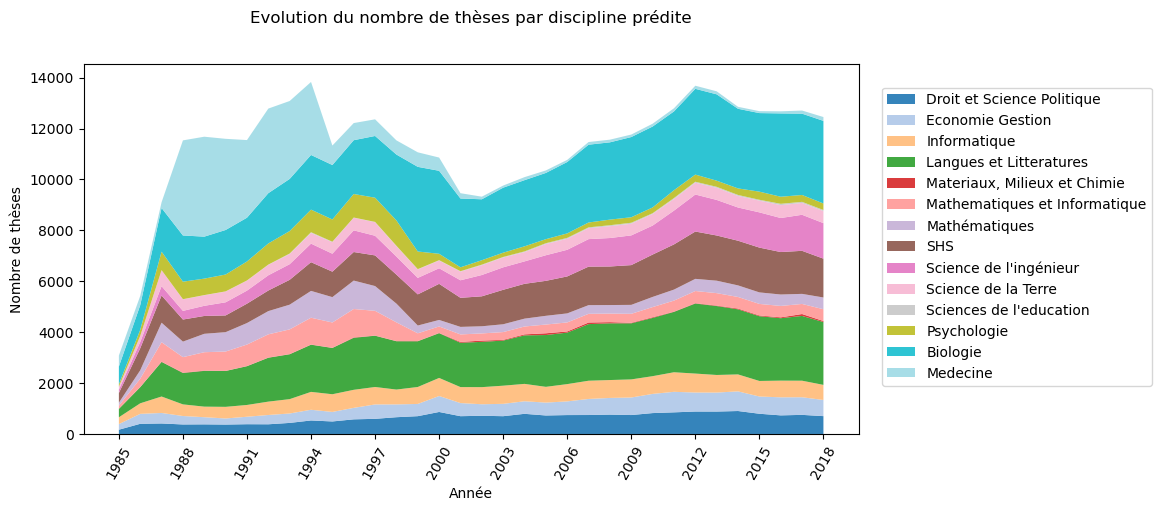

In [17]:

fig, ax = plt.subplots()
fig.set_figwidth(10)
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
cmap = colors = plt.cm.tab20(np.linspace(0, 1, 14))

ax.stackplot(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[0] , df_disc[1] , df_disc[3] , df_disc[4] ,  df_disc[5], df_disc[6], df_disc[6] 
            ,df_disc[7] , df_disc[8], df_disc[9] , df_disc[10], df_disc[11], df_disc[12], df_disc[13]   , labels=disciplines,
            colors = cmap, alpha=0.9);
ax.legend(loc=(1.03,0.13), ncol=1)
ax.set_title('Evolution du nombre de thèses par discipline prédite', pad=30)
ax.set_ylabel('Nombre de thèses')
ax.set_xlabel('Année')
plt.xticks(rotation=60);
current_xticks = ax.get_xticks()
new_xticks = current_xticks[::3] 
ax.set_xticks(new_xticks);

### stacked bar chart

In [18]:
#reset les index pour rendre possible les additions de pandas series
for i in range(0, len(df_disc), 1):
    df_disc[i] = df_disc[i].reset_index(drop=True)

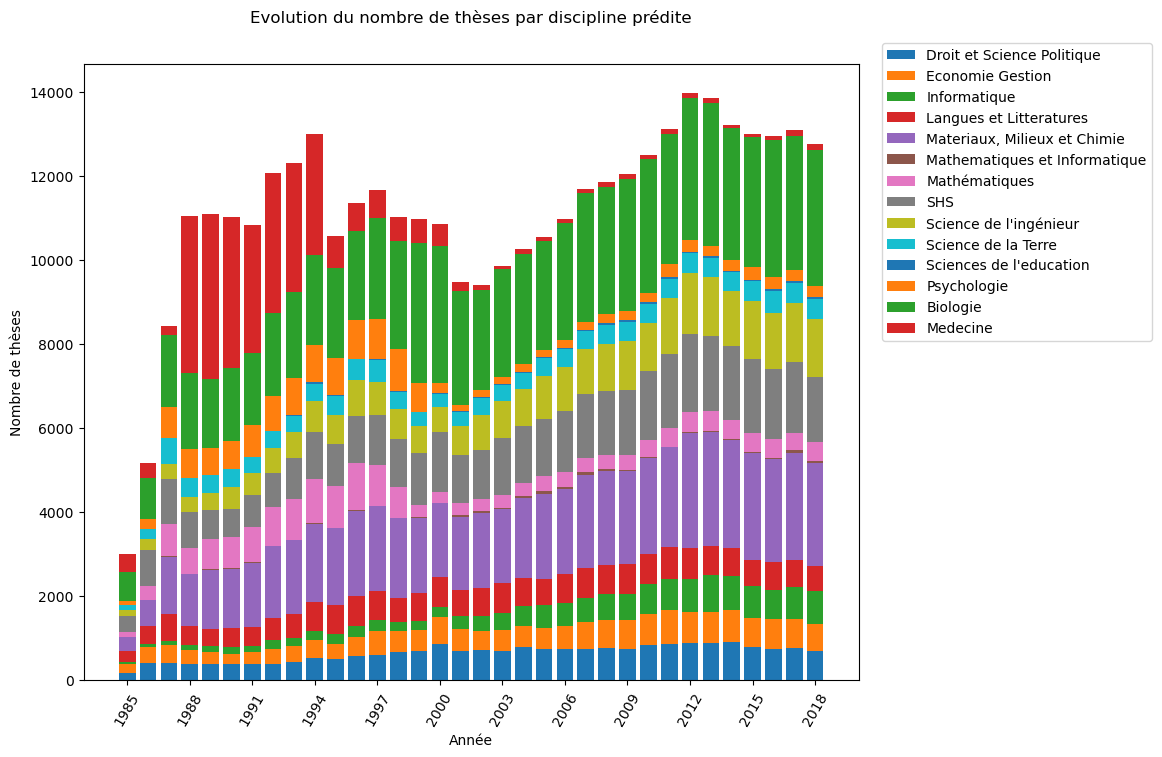

In [19]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[0] , label=disciplines[0])
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[1] , label=disciplines[1],  bottom= df_disc[0])

df_disc_2 = df_disc[0].add(df_disc[1], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[2] , label=disciplines[2],  bottom= df_disc_2)

df_disc_3 = df_disc_2.add(df_disc[2], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[3] , label=disciplines[3],  bottom= df_disc_3)

df_disc_4 = df_disc_3.add(df_disc[3], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[4] , label=disciplines[4],  bottom= df_disc_4)

df_disc_5 = df_disc_4.add(df_disc[4], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[5] , label=disciplines[5],  bottom= df_disc_5)

df_disc_6 = df_disc_5.add(df_disc[5], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[6] , label=disciplines[6],  bottom= df_disc_6)

df_disc_7 = df_disc_6.add(df_disc[6], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[7] , label=disciplines[7],  bottom= df_disc_7)

df_disc_8 = df_disc_7.add(df_disc[7], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[8] , label=disciplines[8],  bottom= df_disc_8)

df_disc_9 = df_disc_8.add(df_disc[8], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[9] , label=disciplines[9],  bottom= df_disc_9)

df_disc_10 = df_disc_9.add(df_disc[9], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[10] , label=disciplines[10],  bottom= df_disc_10)

df_disc_11 = df_disc_10.add(df_disc[10], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[11] , label=disciplines[11],  bottom= df_disc_11)

df_disc_12 = df_disc_11.add(df_disc[11], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[12] , label=disciplines[12],  bottom= df_disc_12)

df_disc_13 = df_disc_12.add(df_disc[12], fill_value=0)
ax.bar(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[13] , label=disciplines[13],  bottom= df_disc_13)


ax.legend(loc=(1.03,0.55), ncol=1)
ax.set_title('Evolution du nombre de thèses par discipline prédite', pad=30)
ax.set_ylabel('Nombre de thèses')
ax.set_xlabel('Année')
plt.xticks(rotation=60);
current_xticks = ax.get_xticks()
new_xticks = current_xticks[::3] 
ax.set_xticks(new_xticks);

In [20]:
try:
    df_theses_1985_2018_ungrouped.to_csv('df_theses_1985_2018_ungrouped.csv', index=False, encoding='utf-8', sep=',')
except Exception as e:
    print("Un exception a eu lieu à la sauvagarde du fichier: {}".format(e) )  

# Exercice 2

## produisez un graphe comprenant une grille en fond

In [21]:
# on charge les données des fleurs en specifiant les nons de colonnes d'après le fichier iris.names
try:
    df_iris= pd.read_csv('iris.data', sep=',', encoding='utf-8', names=(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'classe']) ) 
except FileNotFoundError as fnf:
    print("Fichier non trouvé: {} ".format(fnf))
except pd.errors.EmptyDataError as ede:
    print("Aucune données: {}".format(ede))
except pd.errors.ParserError as pe:
    print("Erreur au parsing: {}".format(pe))
except Exception as e:
    print("Un exception a eu lieu au chargement du fichier: {}".format(e) )

In [22]:
df_iris.head(5)

sepal_length  sepal_width  petal_length  petal_width       classe
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [23]:
try:
    df_iris.to_csv('df_iris_with_headers.csv', index=False, encoding='utf-8', sep=',')
except Exception as e:
    print("Un exception a eu lieu à la sauvagarde du fichier: {}".format(e) )   

## nouveau graphique, légèrement transparent, de sorte que la grille apparaisse derrière le graphe

In [24]:
df_iris_grouped = df_iris.groupby(['classe', 'sepal_length'])['sepal_width'].count()

In [25]:
df_iris_ungrouped = df_iris_grouped.reset_index()

In [26]:
df_iris_ungrouped = df_iris_ungrouped.rename(columns={'sepal_width': 'Total'})

In [27]:
try:
    df_iris_ungrouped.to_csv('df_iris_ungrouped_total.csv', index=False, encoding='utf-8', sep=',')
except Exception as e:
    print("Un exception a eu lieu à la sauvagarde du fichier: {}".format(e) )   

### graphe pour 2 especes Iris-setosa & Iris-versicolor
--> en jouant sur la transparence, on peut voir et distinguer les 2 espèces de fleurs.

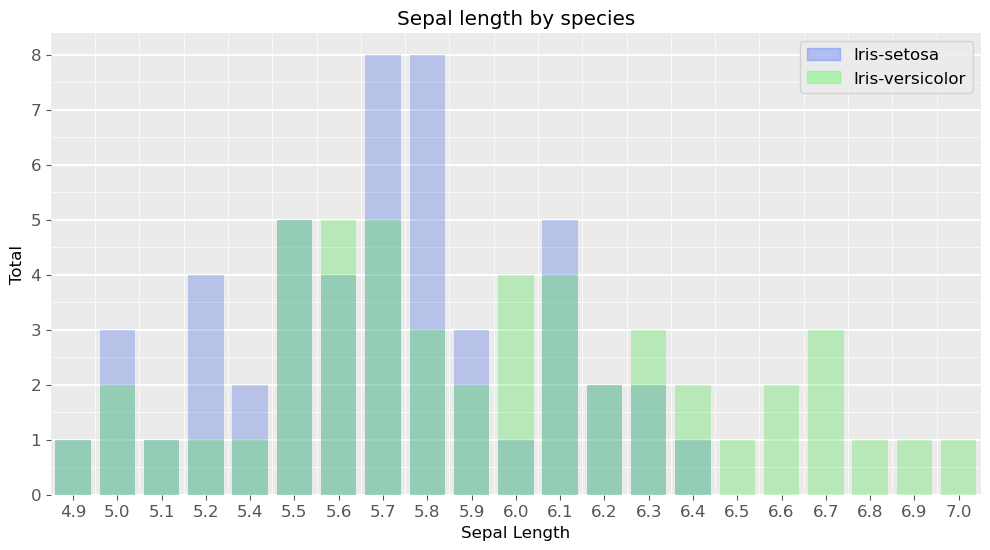

In [28]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'font.size': 12,
    'grid.color': 'white',
    'grid.linewidth': '1.4',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

# Plot an example chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.5)

ax1 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-setosa'], x='sepal_length', y='Total', color='#2A55FF', alpha=0.3, zorder=10)

ax2 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-versicolor'], x='sepal_length', y='Total', color='#2AFF2A', alpha=0.3, zorder=10)

#ax3 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-virginica'], x='sepal_length', y='Total', color='#FF00AA', alpha=0.3, zorder=10)


plt.xlabel('Sepal Length')
plt.title('Sepal length by species')

# Création des objets Patch personnalisés pour les légendes avec transparence
patch1 = mpatches.Patch(color='#2A55FF', alpha=0.3, label='Iris-setosa')
patch2 = mpatches.Patch(color='#2AFF2A', alpha=0.3, label='Iris-versicolor')

# Affichage de la légende avec les objets Patch personnalisés
plt.legend(handles=[patch1, patch2]);


### graphe pour 2 especes Iris-setosa & Iris-virginica
--> en jouant sur la transparence, on peut voir et distinguer les 2 espèces de fleurs.

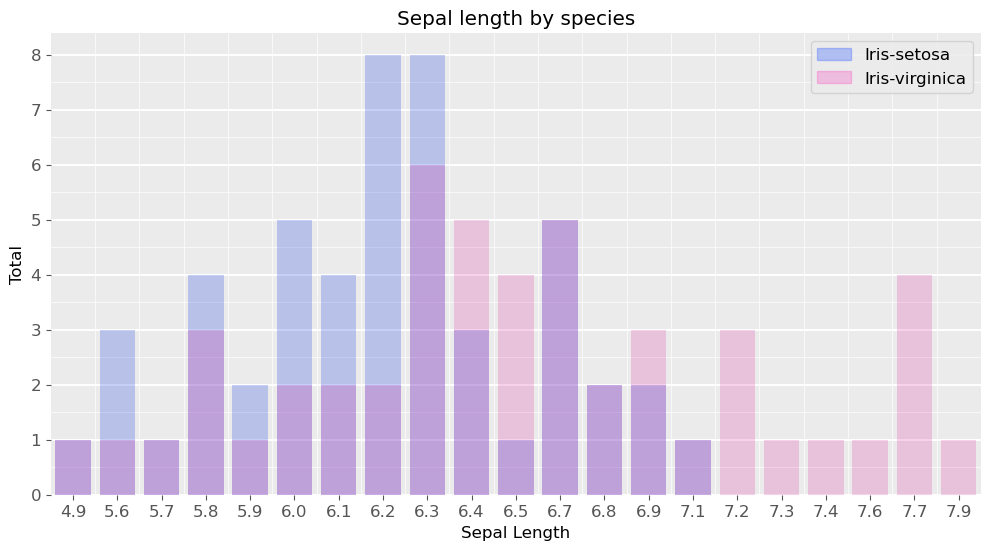

In [29]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'font.size': 12,
    'grid.color': 'white',
    'grid.linewidth': '1.4',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

# Plot an example chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.5)

ax1 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-setosa'], x='sepal_length', y='Total', color='#2A55FF', alpha=0.3, zorder=10)

#ax2 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-versicolor'], x='sepal_length', y='Total', color='#2AFF2A', alpha=0.3, zorder=10)

ax3 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-virginica'], x='sepal_length', y='Total', color='#FF00AA', alpha=0.2, zorder=10)


plt.xlabel('Sepal Length')
plt.title('Sepal length by species')

# Création des objets Patch personnalisés pour les légendes avec transparence
patch1 = mpatches.Patch(color='#2A55FF', alpha=0.3, label='Iris-setosa')
#patch2 = mpatches.Patch(color='#2AFF2A', alpha=0.3, label='Iris-versicolor')
patch3 = mpatches.Patch(color='#FF00AA', alpha=0.2, label='Iris-virginica')

# Affichage de la légende avec les objets Patch personnalisés
plt.legend(handles=[patch1,  patch3]);

### graphe pour 2 especes Iris-virginica & Iris-virginica
--> en jouant sur la transparence, on peut voir et distinguer les 2 espèces de fleurs.

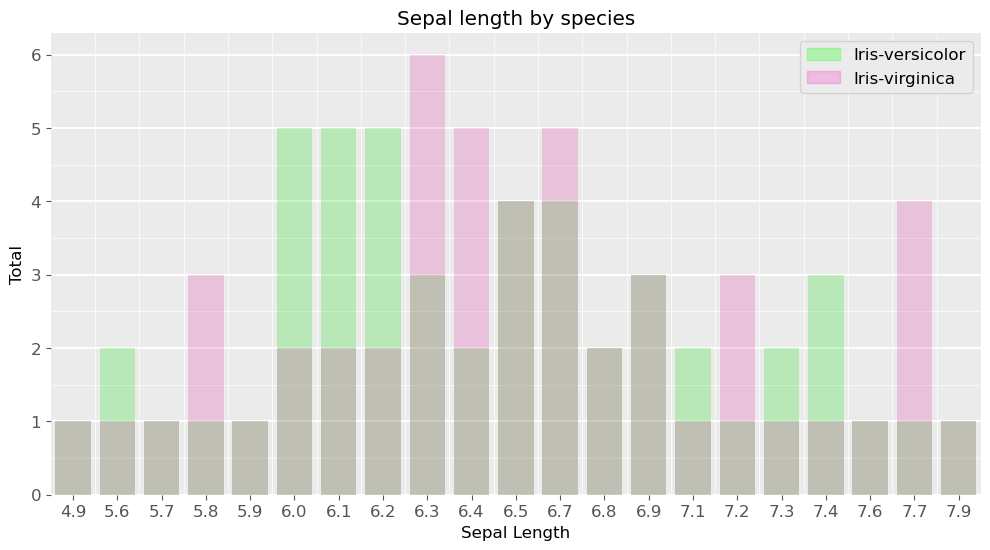

In [30]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'font.size': 12,
    'grid.color': 'white',
    'grid.linewidth': '1.4',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

# Plot an example chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.5)

#ax1 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-setosa'], x='sepal_length', y='Total', color='#2A55FF', alpha=0.3, zorder=10)

ax2 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-versicolor'], x='sepal_length', y='Total', color='#2AFF2A', alpha=0.3, zorder=10)

ax3 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-virginica'], x='sepal_length', y='Total', color='#FF00AA', alpha=0.2, zorder=10)


plt.xlabel('Sepal Length')
plt.title('Sepal length by species')

# Création des objets Patch personnalisés pour les légendes avec transparence
#patch1 = mpatches.Patch(color='#2A55FF', alpha=0.3, label='Iris-setosa')
patch2 = mpatches.Patch(color='#2AFF2A', alpha=0.3, label='Iris-versicolor')
patch3 = mpatches.Patch(color='#FF00AA', alpha=0.2, label='Iris-virginica')

# Affichage de la légende avec les objets Patch personnalisés
plt.legend(handles=[patch2,  patch3]);

Cela devient plus compliqué avec 3 espèces, il y a trop de chevauchement ....

### graphe avec les 3 especes

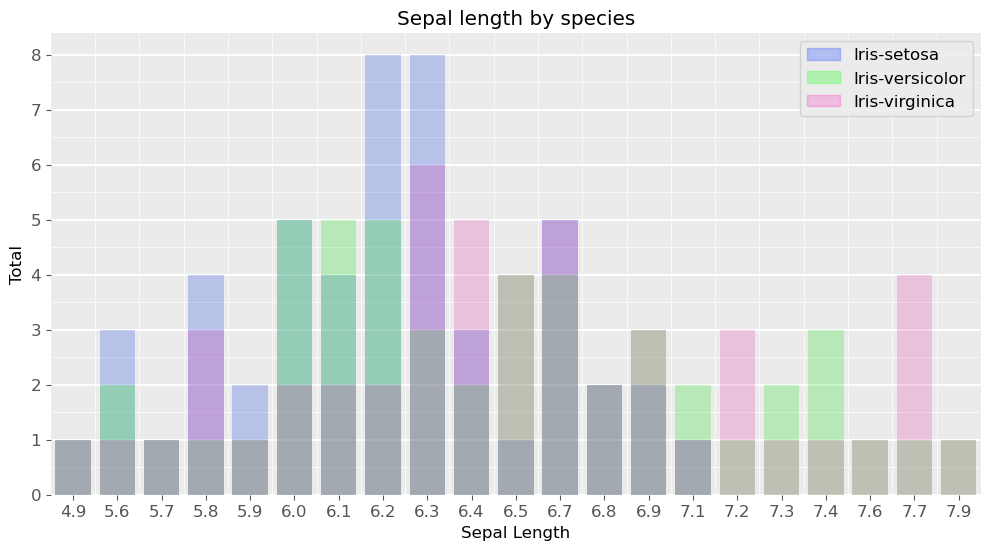

In [31]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'font.size': 12,
    'grid.color': 'white',
    'grid.linewidth': '1.4',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

# Plot an example chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.5)

ax1 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-setosa'], x='sepal_length', y='Total', color='#2A55FF', alpha=0.3, zorder=10)

ax2 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-versicolor'], x='sepal_length', y='Total', color='#2AFF2A', alpha=0.3, zorder=10)

ax3 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-virginica'], x='sepal_length', y='Total', color='#FF00AA', alpha=0.2, zorder=10)


plt.xlabel('Sepal Length')
plt.title('Sepal length by species')

# Création des objets Patch personnalisés pour les légendes avec transparence
patch1 = mpatches.Patch(color='#2A55FF', alpha=0.3, label='Iris-setosa')
patch2 = mpatches.Patch(color='#2AFF2A', alpha=0.3, label='Iris-versicolor')
patch3 = mpatches.Patch(color='#FF00AA', alpha=0.2, label='Iris-virginica')

# Affichage de la légende avec les objets Patch personnalisés
plt.legend(handles=[patch1, patch2, patch3]);

on peut néanmoins se faire un idée par rapport aux couleurs
 . bleu : Iris-setosa
 . vert(clair) :  Iris-versicolor
 . rose : Iris-virginica
 . vert foncé : chevauchement Iris-setosa/Iris-versicolor
 . mauve: chevauchement Iris-setosa/Iris-virginica
 . marron : chevauchement Iris-versicolor/Iris-virginica
 . gris : chevauchement Iris-setosa/Iris-versicolor/Iris-virginica
 
 D'où ce dernier graphe avec une légende plus "adaptée".

### graphe avec légende "adaptée"

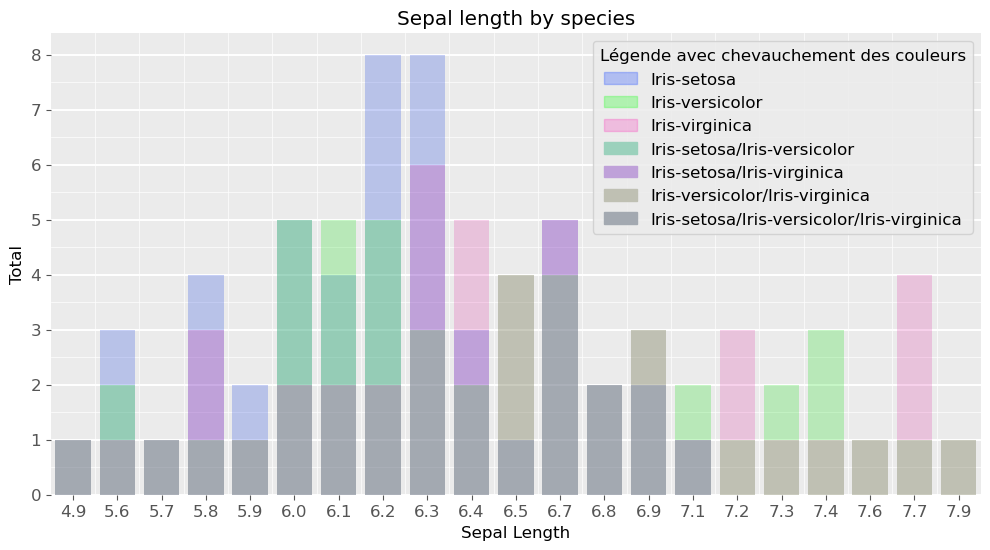

In [32]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'font.size': 12,
    'grid.color': 'white',
    'grid.linewidth': '1.4',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

# Plot an example chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.5)

ax1 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-setosa'], x='sepal_length', y='Total', color='#2A55FF', alpha=0.3, zorder=10)

ax2 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-versicolor'], x='sepal_length' , y='Total', color='#2AFF2A', alpha=0.3, zorder=10)

ax3 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-virginica'], x='sepal_length', y='Total', color='#FF00AA', alpha=0.2, zorder=10)


plt.xlabel('Sepal Length')
plt.title('Sepal length by species')

# Création des objets Patch personnalisés pour les légendes avec transparence
patch1 = mpatches.Patch(color='#2A55FF', alpha=0.3, label='Iris-setosa')
patch2 = mpatches.Patch(color='#2AFF2A', alpha=0.3, label='Iris-versicolor')
patch3 = mpatches.Patch(color='#FF00AA', alpha=0.2, label='Iris-virginica')

patch4 = mpatches.Patch(color='#9BD1BC',  label='Iris-setosa/Iris-versicolor')
patch5 = mpatches.Patch(color='#BFA1D9',  label='Iris-setosa/Iris-virginica')
patch6 = mpatches.Patch(color='#BFC0B3', label='Iris-versicolor/Iris-virginica')
patch7 = mpatches.Patch(color='#A3A9B1',  label= 'Iris-setosa/Iris-versicolor/Iris-virginica')

# Affichage de la légende avec les objets Patch personnalisés
plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7], title="Légende avec chevauchement des couleurs");

# Exercice 3

## Changer la distance entre l’axe et les labels

je reprends le dernier graphe

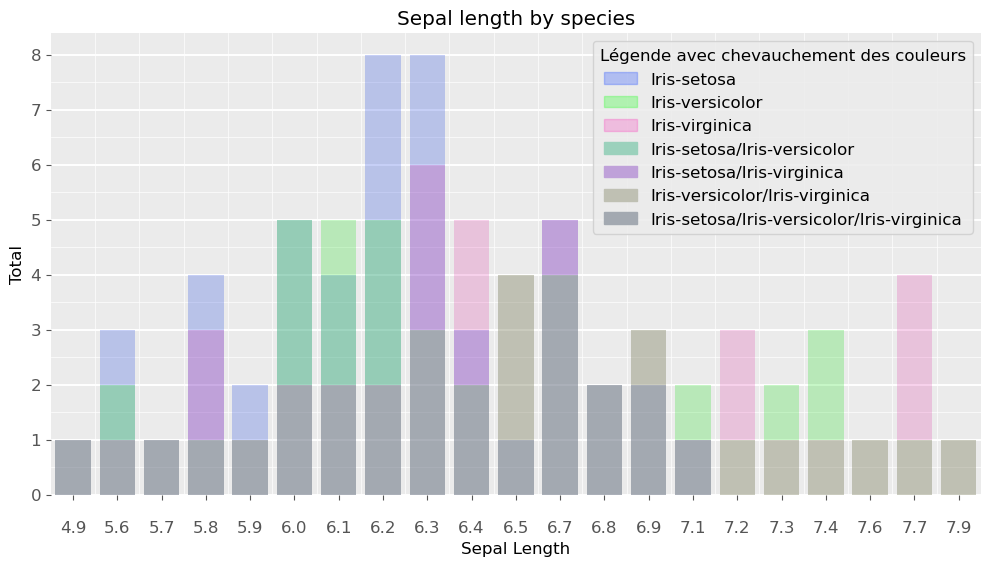

In [33]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'font.size': 12,
    'grid.color': 'white',
    'grid.linewidth': '1.4',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

# Plot an example chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.5)

ax1 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-setosa'], x='sepal_length', y='Total', color='#2A55FF', alpha=0.3, zorder=10)

ax2 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-versicolor'], x='sepal_length', y='Total', color='#2AFF2A', alpha=0.3, zorder=10)

ax3 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-virginica'], x='sepal_length', y='Total', color='#FF00AA', alpha=0.2, zorder=10)


plt.xlabel('Sepal Length')
plt.title('Sepal length by species')

patch4 = mpatches.Patch(color='#9BD1BC',  label='Iris-setosa/Iris-versicolor')
patch5 = mpatches.Patch(color='#BFA1D9',  label='Iris-setosa/Iris-virginica')
patch6 = mpatches.Patch(color='#BFC0B3', label='Iris-versicolor/Iris-virginica')
patch7 = mpatches.Patch(color='#A3A9B1',  label= 'Iris-setosa/Iris-versicolor/Iris-virginica')

# Affichage de la légende avec les objets Patch personnalisés
plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7], title="Légende avec chevauchement des couleurs");
ax.xaxis.set_tick_params(pad=+15)

les valeurs en abcisse ont bien descendu.

## Rotation de 45° des valeurs en abcisse

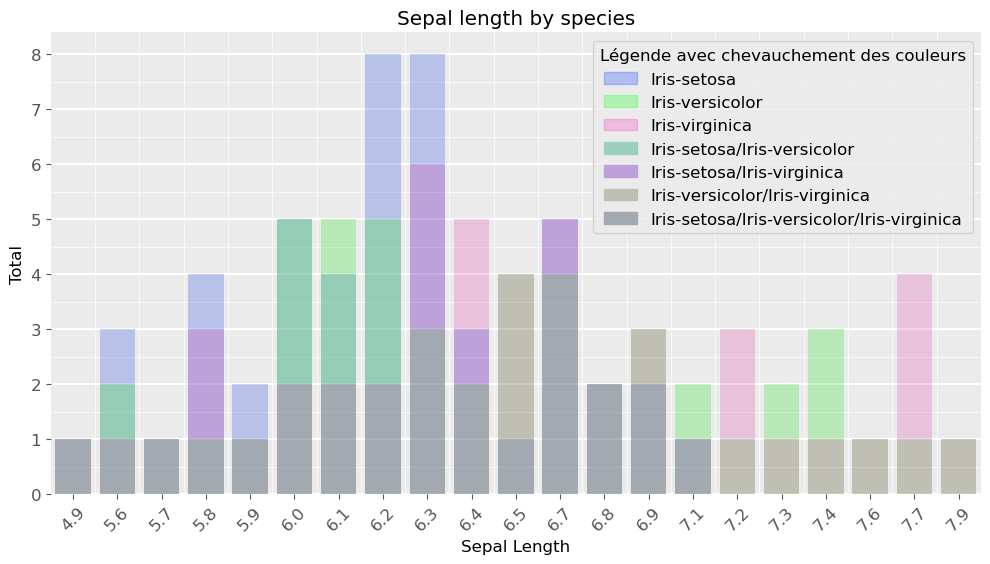

In [34]:
ggplot_styles = {
    'axes.edgecolor': 'white',
    'axes.facecolor': 'EBEBEB',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'font.size': 12,
    'grid.color': 'white',
    'grid.linewidth': '1.4',
    'xtick.color': '555555',
    'xtick.major.bottom': True,
    'xtick.minor.bottom': False,
    'ytick.color': '555555',
    'ytick.major.left': True,
    'ytick.minor.left': False,
}

plt.rcParams.update(ggplot_styles)

# Plot an example chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Set minor ticks/gridline cadence.
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn minor gridlines on and make them thinner.
ax.grid(which='minor', linewidth=0.5)

ax1 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-setosa'], x='sepal_length', y='Total', color='#2A55FF', alpha=0.3, zorder=10)

ax2 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-versicolor'], x='sepal_length', y='Total', color='#2AFF2A', alpha=0.3, zorder=10)

ax3 = sns.barplot(data=df_iris_ungrouped[df_iris_ungrouped['classe']== 'Iris-virginica'], x='sepal_length', y='Total', color='#FF00AA', alpha=0.2, zorder=10)


plt.xlabel('Sepal Length')
plt.title('Sepal length by species')

patch4 = mpatches.Patch(color='#9BD1BC',  label='Iris-setosa/Iris-versicolor')
patch5 = mpatches.Patch(color='#BFA1D9',  label='Iris-setosa/Iris-virginica')
patch6 = mpatches.Patch(color='#BFC0B3', label='Iris-versicolor/Iris-virginica')
patch7 = mpatches.Patch(color='#A3A9B1',  label= 'Iris-setosa/Iris-versicolor/Iris-virginica')

# Affichage de la légende avec les objets Patch personnalisés
plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7], title="Légende avec chevauchement des couleurs");

ax.tick_params(axis='x', rotation=45)

# Exercice 4

In [35]:
## graphe "normal"

In [36]:
x= list(range(1,11,1))
y= list(range(1,11,1))

In [37]:
# Réinitialiser les styles de graphiques
mpl.rcParams.update(mpl.rcParamsDefault)

In [38]:
## graphe en jouant sur les marges ...

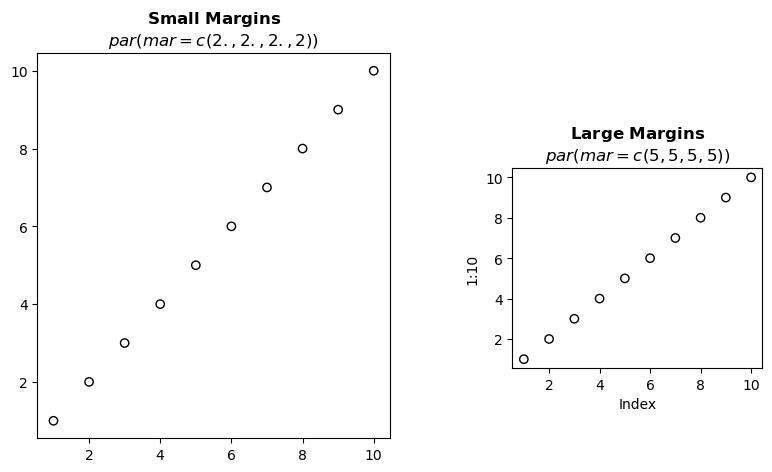

In [39]:
# Données pour le tracé
x= list(range(1,11,1))
y= list(range(1,11,1))

# Créer la figure et les axes des sous-graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Tracé du premier graphe
ax1.scatter(x, y,  color='none', edgecolor='black', marker='o')
ax1.set_title(r'$\bf{Small\ Margins}$' + '\n' + r'$par(mar = c(2.,2.,2.,2))$', fontsize=12)
#ax1.set_title(r'\fontsize{30pt}{3em}\selectfont{}{Mean WRFv3.5 LHF\r}{\fontsize{18pt}{3em}\selectfont{}(September 16 - October 30, 2012)}')

# Tracé du deuxième graphe (plus petit)
ax2.scatter(x, y, color='none', edgecolor='black', marker='o')
ax2.set_title(r'$\bf{Large\ Margins}$' + '\n' + r'$par(mar = c(5,5,5,5))$', fontsize=12)
ax2.set_position([0.6, 0.25, 0.25, 0.4])  # Ajuster la position et la taille du deuxième graphe
plt.xlabel('Index')
plt.ylabel('1:10')
# Afficher les sous-graphes
plt.show()

# Exercice 5: production d'un graphe où vous changez l’échelle des Y par une échelle logarithmique.

Commençons par une fonction exponentielle

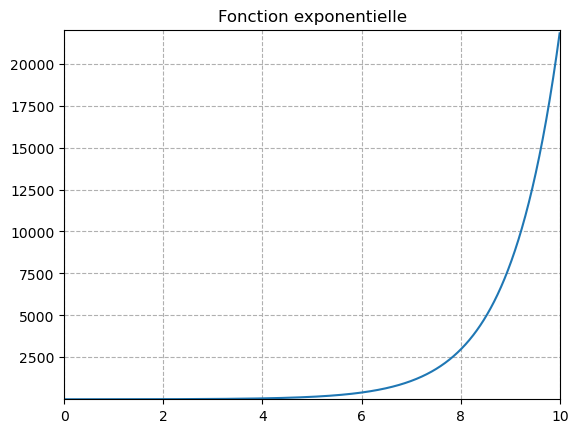

In [40]:
x_min = 0
x_max = 10.0

x = np.arange(x_min, x_max, .01)
y = np.exp(x)

plt.plot(x,y)

plt.xlim(x_min,x_max)
plt.ylim(np.exp(x_min),np.exp(x_max))

plt.grid(True,which="both", linestyle='--')

plt.title('Fonction exponentielle', fontsize=12)
plt.show()

--> Rappel de math ln(exp(x)) = x

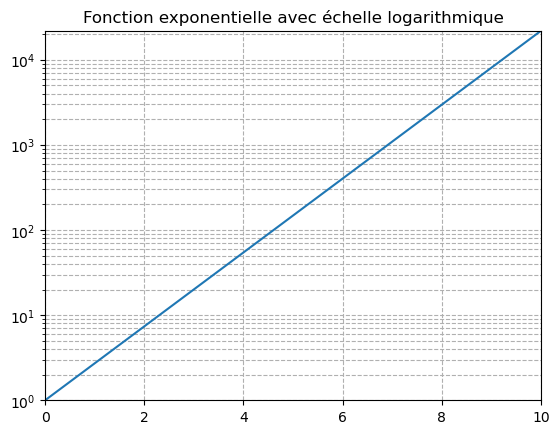

In [41]:
x_min = 0
x_max = 10.0

x = np.arange(x_min, x_max, .01)
y = np.exp(x)

plt.plot(x,y)

plt.xlim(x_min,x_max)
plt.ylim(np.exp(x_min),np.exp(x_max))

plt.yscale('log')

plt.grid(True,which="both", linestyle='--')

plt.title('Fonction exponentielle avec échelle logarithmique', fontsize=12)

plt.show()

# Exercice 6: production de graphique avec deux positions différentes de la légende.

## Reprenons le 1° graphique et mettons sa legende en haut

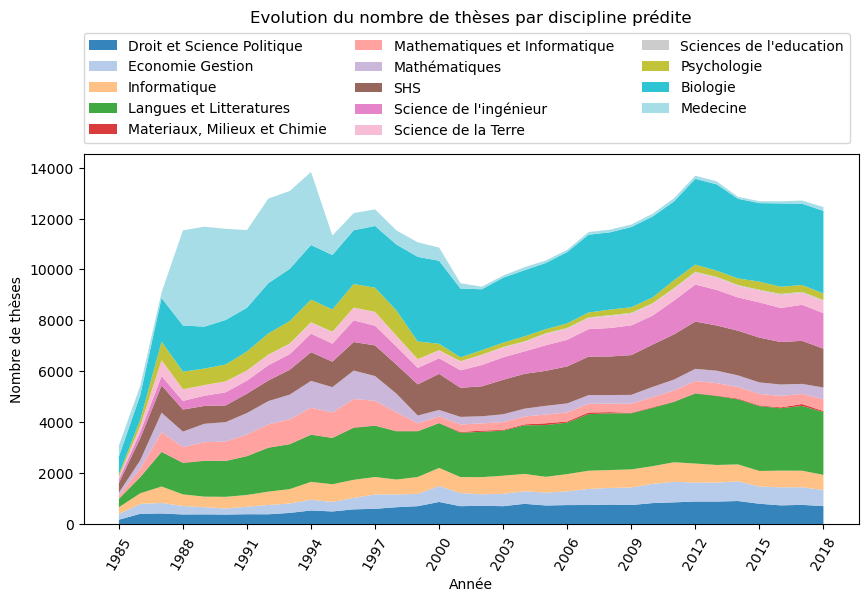

In [42]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
cmap = colors = plt.cm.tab20(np.linspace(0, 1, 14))

ax.stackplot(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[0] , df_disc[1] , df_disc[3] , df_disc[4] ,  df_disc[5], df_disc[6], df_disc[6] 
            ,df_disc[7] , df_disc[8], df_disc[9] , df_disc[10], df_disc[11], df_disc[12], df_disc[13]   , labels=disciplines,
            colors = cmap, alpha=0.9);
ax.legend(loc=(0.,1.03), ncol=3)
ax.set_title('Evolution du nombre de thèses par discipline prédite', pad=95)
ax.set_ylabel('Nombre de thèses')
ax.set_xlabel('Année')
plt.xticks(rotation=60);
current_xticks = ax.get_xticks()
new_xticks = current_xticks[::3] 
ax.set_xticks(new_xticks);
plt.show()

## Reprenons le 1° graphique et mettons sa legende à gauche

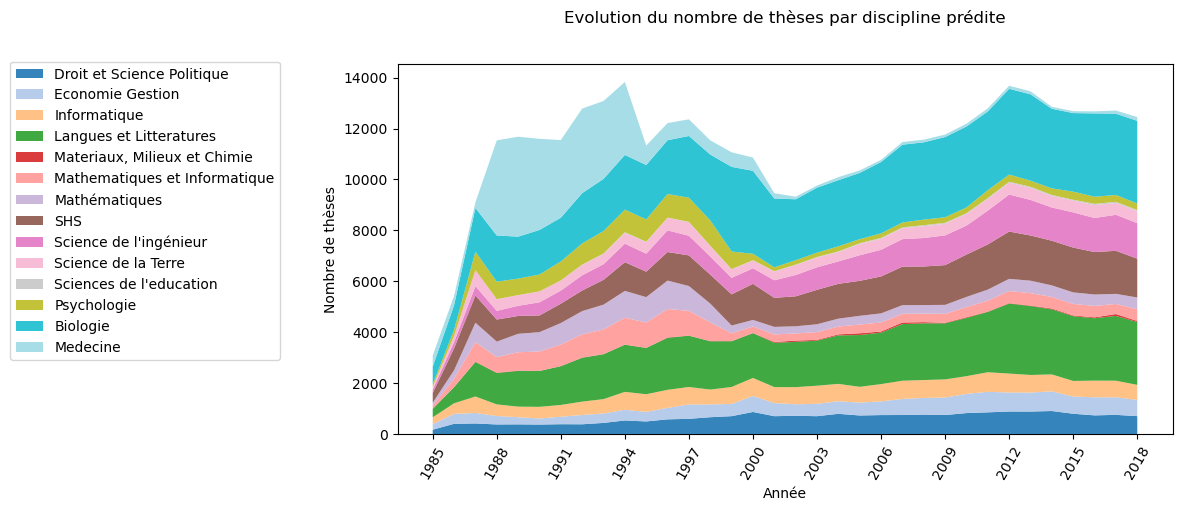

In [43]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
cmap = colors = plt.cm.tab20(np.linspace(0, 1, 14))

ax.stackplot(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[0] , df_disc[1] , df_disc[3] , df_disc[4] ,  df_disc[5], df_disc[6], df_disc[6] 
            ,df_disc[7] , df_disc[8], df_disc[9] , df_disc[10], df_disc[11], df_disc[12], df_disc[13]   , labels=disciplines,
            colors = cmap, alpha=0.9);
ax.legend(loc=(-0.5,0.2), ncol=1)
ax.set_title('Evolution du nombre de thèses par discipline prédite', pad=30)
ax.set_ylabel('Nombre de thèses')
ax.set_xlabel('Année')
plt.xticks(rotation=60);
current_xticks = ax.get_xticks()
new_xticks = current_xticks[::3] 
ax.set_xticks(new_xticks);
plt.show()

## Reprenons le 1° graphique et mettons sa legende en bas

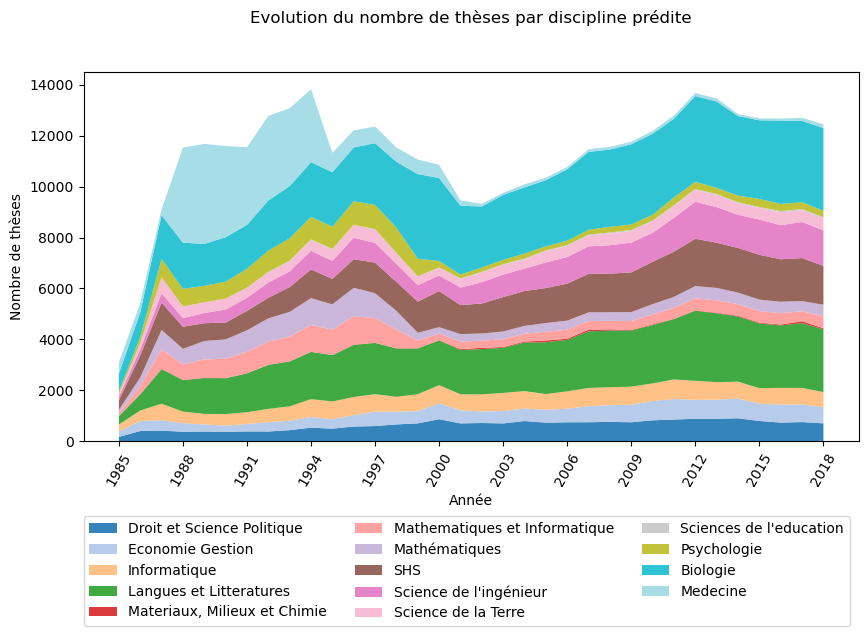

In [44]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
cmap = colors = plt.cm.tab20(np.linspace(0, 1, 14))

ax.stackplot(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[0] , df_disc[1] , df_disc[3] , df_disc[4] ,  df_disc[5], df_disc[6], df_disc[6] 
            ,df_disc[7] , df_disc[8], df_disc[9] , df_disc[10], df_disc[11], df_disc[12], df_disc[13]   , labels=disciplines,
            colors = cmap, alpha=0.9);
ax.legend(loc=(0.,-.5), ncol=3)
ax.set_title('Evolution du nombre de thèses par discipline prédite', pad=35)
ax.set_ylabel('Nombre de thèses')
ax.set_xlabel('Année')
plt.xticks(rotation=60);
current_xticks = ax.get_xticks()
new_xticks = current_xticks[::3] 
ax.set_xticks(new_xticks);
plt.show()

# Exercice 7: changement de la palette de couleur utilisée pour représenter les différentes disciplines

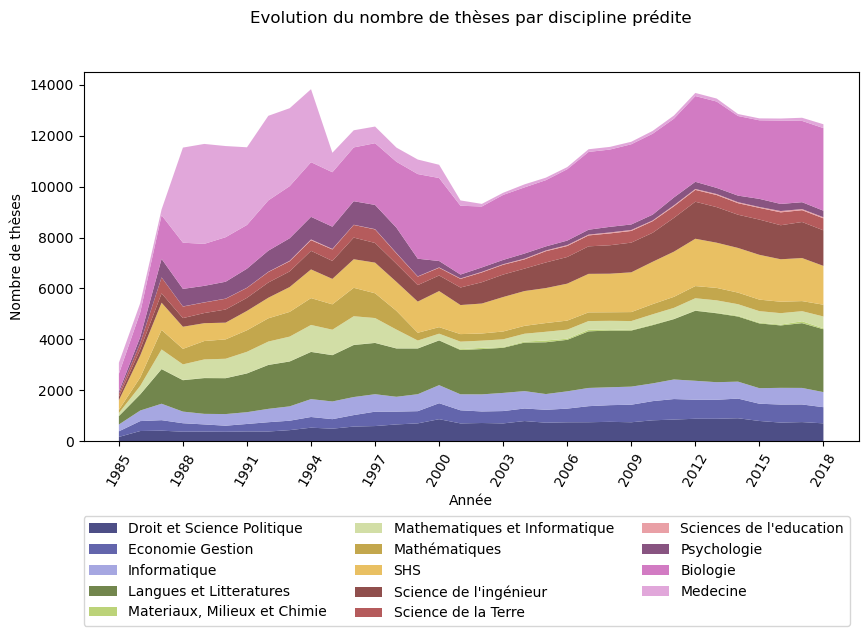

In [45]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
cmap = colors = plt.cm.tab20b(np.linspace(0, 1, 14))

ax.stackplot(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[0] , df_disc[1] , df_disc[3] , df_disc[4] ,  df_disc[5], df_disc[6], df_disc[6] 
            ,df_disc[7] , df_disc[8], df_disc[9] , df_disc[10], df_disc[11], df_disc[12], df_disc[13]   , labels=disciplines,
            colors = cmap, alpha=0.9);
ax.legend(loc=(0.,-.5), ncol=3)
ax.set_title('Evolution du nombre de thèses par discipline prédite', pad=35)
ax.set_ylabel('Nombre de thèses')
ax.set_xlabel('Année')
plt.xticks(rotation=60);
current_xticks = ax.get_xticks()
new_xticks = current_xticks[::3] 
ax.set_xticks(new_xticks);
plt.show()

# Exercice 8:  changement de l’ordre (de bas en haut) dans lequel apparaissent les disciplines

on inverse les disciplines

In [46]:
disciplines=['Medecine' , 'Biologie', 'Psychologie',"Sciences de l'education",'Science de la Terre', 
             "Science de l'ingénieur",'SHS', 'Mathématiques', 'Mathematiques et Informatique',
            'Materiaux, Milieux et Chimie',  'Langues et Litteratures',   'Informatique',  
             'Economie Gestion', 'Droit et Science Politique']

In [47]:
df_theses_1985_2018_ungrouped['Discipline prédite'].unique()

array(['Biologie', 'Droit et Science Politique', 'Economie Gestion',
       'Informatique', 'Langues et Litteratures',
       'Materiaux, Milieux et Chimie', 'Mathematiques et Informatique',
       'Mathématiques', 'Medecine', 'Psychologie', 'SHS',
       "Science de l'ingénieur", 'Science de la Terre',
       "Sciences de l'education", 'Poubelle'], dtype=object)

In [48]:
df_disc = []
i=0

for discipline in disciplines:
    df_disc.append( df_theses_1985_2018_ungrouped[df_theses_1985_2018_ungrouped['Discipline prédite'] == discipline ]["Nombre de thèses"] )
    #print(discipline)
    #print(len(df_disc[i]))
    i=i+1

In [49]:
df_theses_1985_2018_ungrouped['Année'] = df_theses_1985_2018_ungrouped['Année'].astype(np.int64).astype(str)

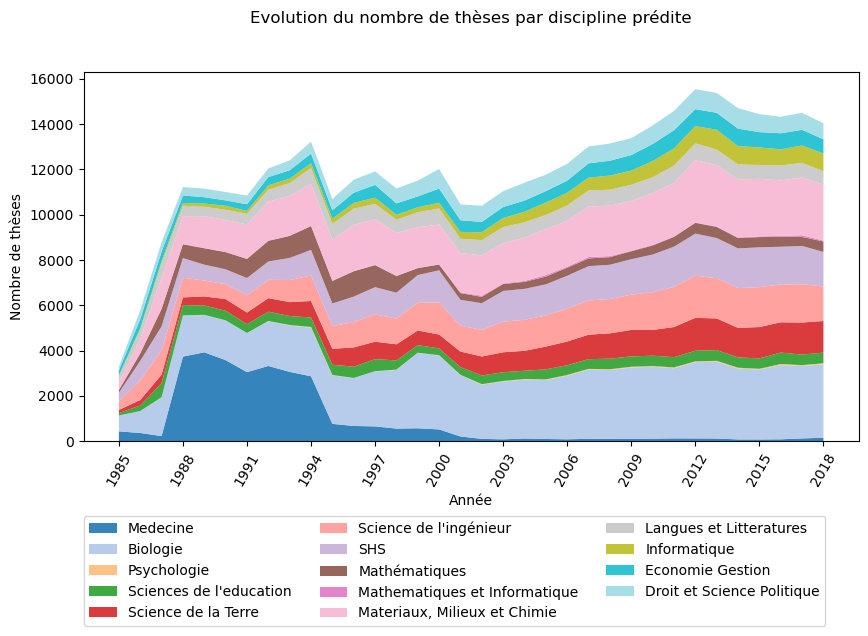

In [50]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
#https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
cmap = colors = plt.cm.tab20(np.linspace(0, 1, 14))

ax.stackplot(df_theses_1985_2018_ungrouped['Année'].unique(), df_disc[0] , df_disc[1] , df_disc[3] , df_disc[4] ,  df_disc[5], df_disc[6], df_disc[6] 
            ,df_disc[7] , df_disc[8], df_disc[9] , df_disc[10], df_disc[11], df_disc[12], df_disc[13]   , labels=disciplines,
            colors = cmap, alpha=0.9);
ax.legend(loc=(0.,-.5), ncol=3)
ax.set_title('Evolution du nombre de thèses par discipline prédite', pad=35)
ax.set_ylabel('Nombre de thèses')
ax.set_xlabel('Année')
plt.xticks(rotation=60);
current_xticks = ax.get_xticks()
new_xticks = current_xticks[::3] 
ax.set_xticks(new_xticks);
plt.show()

# Exercice 9

## Graphique interactif contenant un slider

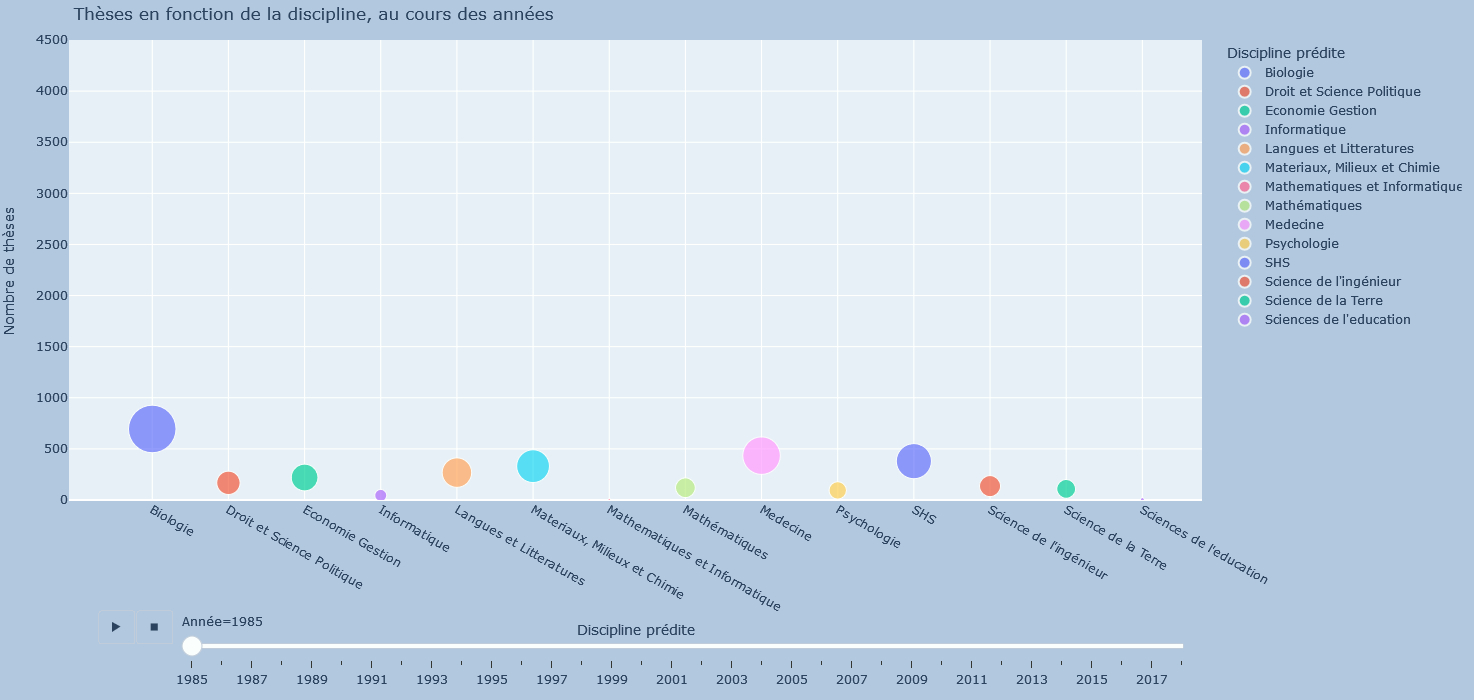

In [51]:
fig1 = px.scatter(
    data_frame=df_theses_1985_2018_ungrouped, y='Nombre de thèses', x='Discipline prédite',
    color='Discipline prédite', animation_frame="Année", size="Nombre de thèses",  hover_name="Nombre de thèses",
     width=1200, height=700, size_max =80,  title="Thèses en fonction de la discipline, au cours des années")
fig1.update_layout({
        'yaxis': {'range': [0,4500]}
})
#fig['layout'].pop("updatemenus")
fig1.update_layout(margin=dict(l=20, r=20, t=40, b=200),paper_bgcolor="LightSteelBlue")
fig1['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 110)
fig1['layout']['sliders'][0]['pad']=dict(r= 10, t= 110,)


fig1.show();

In [52]:
#on sauve le widget
fig1.write_html(r"./widgets/theses_fct_discipline_année.html", full_html=False)

--> quelques calculs pour le rapport

In [53]:
#### df_theses_1989_ungrouped = df_theses_1985_2018_ungrouped[df_theses_1985_2018_ungrouped['Année'] =='1989' ]
df_theses_1989_ungrouped = df_theses_1985_2018_ungrouped[df_theses_1985_2018_ungrouped['Année'] =='1989' ]
df_theses_2018_ungrouped = df_theses_1985_2018_ungrouped[df_theses_1985_2018_ungrouped['Année'] =='2018' ]

nb_theses_1989 = df_theses_1989_ungrouped['Nombre de thèses'].sum()
nb_theses_2018 = df_theses_2018_ungrouped['Nombre de thèses'].sum()
print (" - Nb theses -  en 1989: "+ str(nb_theses_1989) + " - en 2018 : "+ str(nb_theses_2018))

nb_theses_1989_biologie =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Biologie']['Nombre de thèses'].sum()
nb_theses_1989_droit =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Droit et Science Politique']['Nombre de thèses'].sum()
nb_theses_1989_eco =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Economie Gestion']['Nombre de thèses'].sum()
nb_theses_1989_info =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Informatique']['Nombre de thèses'].sum()
nb_theses_1989_litter =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Langues et Litteratures']['Nombre de thèses'].sum()
nb_theses_1989_matchim =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Materiaux, Milieux et Chimie']['Nombre de thèses'].sum()
nb_theses_1989_mathinfo =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Mathematiques et Informatique']['Nombre de thèses'].sum()
nb_theses_1989_math =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Mathématiques']['Nombre de thèses'].sum()
nb_theses_1989_medic =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Medecine']['Nombre de thèses'].sum()
nb_theses_1989_psy =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='Psychologie']['Nombre de thèses'].sum()
nb_theses_1989_shs =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=='SHS']['Nombre de thèses'].sum()
nb_theses_1989_siinge =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=="Science de l'ingénieur"]['Nombre de thèses'].sum()
nb_theses_1989_siterre =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=="Science de la Terre"]['Nombre de thèses'].sum()
nb_theses_1989_sieduc =  df_theses_1989_ungrouped[df_theses_1989_ungrouped['Discipline prédite']=="Sciences de l'education"]['Nombre de thèses'].sum()


nb_theses_2018_biologie =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Biologie']['Nombre de thèses'].sum()
nb_theses_2018_droit =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Droit et Science Politique']['Nombre de thèses'].sum()
nb_theses_2018_eco =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Economie Gestion']['Nombre de thèses'].sum()
nb_theses_2018_info =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Informatique']['Nombre de thèses'].sum()
nb_theses_2018_litter =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Langues et Litteratures']['Nombre de thèses'].sum()
nb_theses_2018_matchim =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Materiaux, Milieux et Chimie']['Nombre de thèses'].sum()
nb_theses_2018_mathinfo =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Mathematiques et Informatique']['Nombre de thèses'].sum()
nb_theses_2018_math =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Mathématiques']['Nombre de thèses'].sum()
nb_theses_2018_medic =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Medecine']['Nombre de thèses'].sum()
nb_theses_2018_psy =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='Psychologie']['Nombre de thèses'].sum()
nb_theses_2018_shs =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=='SHS']['Nombre de thèses'].sum()
nb_theses_2018_siinge =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=="Science de l'ingénieur"]['Nombre de thèses'].sum()
nb_theses_2018_siterre =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=="Science de la Terre"]['Nombre de thèses'].sum()
nb_theses_2018_sieduc =  df_theses_2018_ungrouped[df_theses_2018_ungrouped['Discipline prédite']=="Sciences de l'education"]['Nombre de thèses'].sum()






print("1989: "+ str(nb_theses_1989_biologie)+ " "+ str(nb_theses_1989_droit) + " " +str(nb_theses_1989_eco)+ " "+
      str(nb_theses_1989_info) +" "+ str(nb_theses_1989_litter)  + " "+ str(nb_theses_1989_matchim) + " "+ 
      str (nb_theses_1989_mathinfo) + " "+ str(nb_theses_1989_math) + " "+ str(nb_theses_1989_medic) + " " + str(nb_theses_1989_psy) +" "
     +str(nb_theses_1989_shs) + " " + str(nb_theses_1989_siinge) + " "+ str(nb_theses_1989_siterre) + " " +str(nb_theses_1989_sieduc))

print("2018: "+ str(nb_theses_2018_biologie)+ " "+ str(nb_theses_2018_droit) + " " +str(nb_theses_2018_eco)+ " "+ str(nb_theses_2018_info)
      +" "+ str(nb_theses_2018_litter) + " "+ str(nb_theses_2018_matchim) + " "+ str (nb_theses_2018_mathinfo) + " "+ str(nb_theses_2018_math)
      + " "+ str(nb_theses_2018_medic) + " " + str(nb_theses_2018_psy) +" " +str(nb_theses_2018_shs) + " " + str(nb_theses_2018_siinge) 
      + " "+ str(nb_theses_2018_siterre) + " " +str(nb_theses_2018_sieduc))


 - Nb theses -  en 1989: 11102 - en 2018 : 12805
1989: 1649 378 281 144 415 1405 10 723 3926 647 701 399 415 6
2018: 3245 701 635 777 593 2469 40 462 151 256 1525 1396 471 45


--> Faisons maintenant un graphique différent avec en plus des disciplines, la langue de la thèse.

In [54]:
d = defaultdict(lambda: 'Autre')
d.update({"fr": "Français", "en": "Anglais", "enfr":"Bilingue", "fren":"Bilingue"})

df_theses["language.rec"] = df_theses["Langue de la these"].map(d)
print(df_theses['language.rec'].dropna().unique())

['Autre' 'Français' 'Anglais' 'Bilingue']


In [55]:
df_yladg = (df_theses[["Année", "language.rec", "Auteur", "Discipline prédite"]]).fillna(0)
df_yladg['Année'] = df_yladg['Année'].astype(np.int64)

In [56]:
df_yladg_9018 = df_yladg[ (df_yladg ["Année"] >= 1990) & (df_theses ["Année"] <= 2018) ]

In [57]:
df_yladg_9018_grouped = df_yladg_9018.groupby(["Année", "language.rec","Discipline prédite"]) ['Auteur'].count()
df_yladg_9018_ungrouped = df_yladg_9018_grouped.reset_index()


df_yladg_9018_ungrouped=df_yladg_9018_ungrouped.rename(columns={'Auteur': 'Nombre de thèses'})

df_yladg_9018_ungrouped = df_yladg_9018_ungrouped.replace(['MathÃ©matiques'], 'Mathématiques')
df_yladg_9018_ungrouped = df_yladg_9018_ungrouped.replace(["Science de l'ingÃ©nieur"], "Science de l'ingénieur")
df_yladg_9018_ungrouped = df_yladg_9018_ungrouped.sort_values(['Année', 'Discipline prédite'])

#poubelle à la poubelle ....
df_yladg_9018_ungrouped = df_yladg_9018_ungrouped[df_yladg_9018_ungrouped['Discipline prédite'] !='Poubelle']

In [58]:
try:
    df_yladg_9018_ungrouped.to_csv('df_yladg_9018_ungrouped.csv', index=False, encoding='utf-8', sep=',')
except Exception as e:
    print("Un exception a eu lieu à la sauvagarde du fichier: {}".format(e) ) 

Un exception a eu lieu à la sauvagarde du fichier: [Errno 13] Permission denied: 'df_yladg_9018_ungrouped.csv'


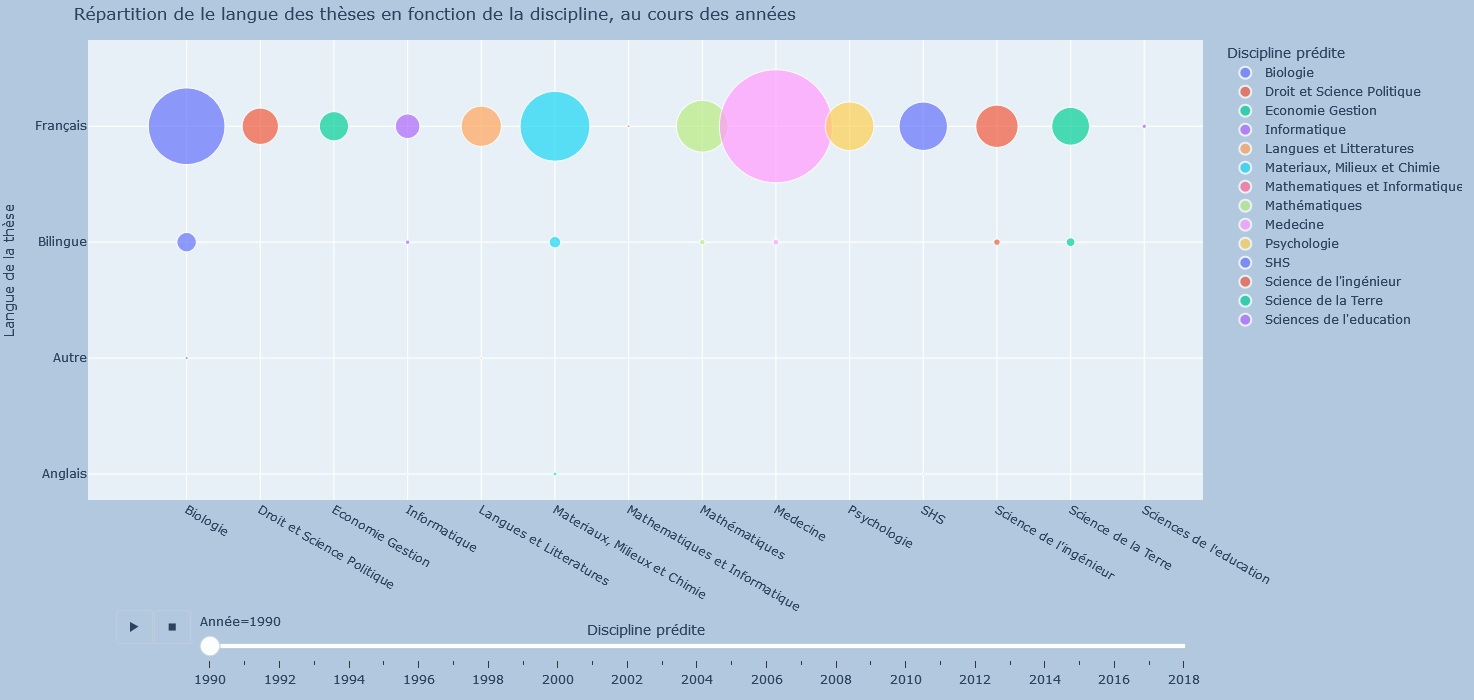

In [59]:
fig2 = px.scatter(
    data_frame=df_yladg_9018_ungrouped, y='language.rec', x='Discipline prédite',
    color='Discipline prédite', animation_frame="Année", size="Nombre de thèses",  hover_name="Nombre de thèses",
     width=1200, height=700, size_max =80, title="Répartition de le langue des thèses en fonction de la discipline, au cours des années",
        labels={
                     "language.rec": "Langue de la thèse",
                 }
)

#fig.update_layout({ 'yaxis': {'range': [0,4500]} })
#fig['layout'].pop("updatemenus")

fig2.update_layout(margin=dict(l=20, r=20, t=40, b=200),paper_bgcolor="LightSteelBlue")
fig2['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 110)
fig2['layout']['sliders'][0]['pad']=dict(r= 10, t= 110,)

#fig.update_traces(hovertemplate = "<b><i>Nombre de thèses</i>: %{y}</b> <br><b><i>Discipline</i>: %{x}</b> <br> <b>Année: </b>: %{data_frame['Année']}")

fig2.show();

In [60]:
#on sauve le widget
fig2.write_html(r"./widgets/repartition_langue_theses_fct_disc_année.html", full_html=False)

--> quelques calculs pour le rapport

In [61]:

df_yladg_1990_ungrouped = df_yladg_9018_ungrouped[df_yladg_9018_ungrouped['Année'] ==1990 ]
df_yladg_2018_ungrouped = df_yladg_9018_ungrouped[df_yladg_9018_ungrouped['Année'] ==2018 ]

nb_theses_yladg_1990 = df_yladg_1990_ungrouped['Nombre de thèses'].sum()
nb_theses_yladg_2018 = df_yladg_2018_ungrouped['Nombre de thèses'].sum()
print (" - Nb theses -  en 1989: "+ str(nb_theses_yladg_1990) + " - en 2018 : "+ str(nb_theses_yladg_2018))


 - Nb theses -  en 1989: 11010 - en 2018 : 12766


    bio
        anglais : 1 0%  , 730 5.6%
        autre : 3  0% , 242 1.9%
        bilingue : 106 1% , 353 2.8%
        francais : 1640  14.9% , 1920 15%
    droit
        anglais :  0% , 10 0.1%
        autre :   0% , 52 0.4%
        bilingue :  0% , 6 0%
        francais : 370 3.4% , 633 5%
    eco
        anglais :  0% , 232 1.8%
        autre :   0%  , 33 0.3%
        bilingue :  0% , 40 0.3%
        francais : 239 2.2%   , 330 2.6%
    info
        anglais : 1  0%, 420 3.3%
        autre :   0%  , 21 0.2%
        bilingue : 6  0% , 13 0.1%
        francais : 169 1.5%  , 323 2.5%
    litter
        anglais :   0% , 26 0.2%
        autre :   0% , 67 0.5%
        bilingue : 6  0% , 6 0%
        francais : 455 4.1% , 494 3.9%
    mater
        anglais :   0% , 944 7.4% 
        autre :   0% , 110 0.9%
        bilingue : 38  0.3% , 120 0.9%
        francais : 1399 12.4%    , 1295 10.1%
    matinfo
        anglais :   0%, 29 0.2%
        autre :   0% , 0 0%
        bilingue :   0% , 3 0%
        francais :  0%   , 8 0.1%
     math
        anglais :   0% , 241 1.9%
        autre :   0% ,  13 0.1%
        bilingue :   0% , 55 0.4%
        francais : 751 6.8% , 153 1.2%
    medic
        anglais :   0% , 21
        autre :   0%  , 24 
        bilingue :   0% , 8
        francais : 3570 32.5% , 98 
     psy
        anglais :   0%, 16
        autre :   0%  , 19 
        bilingue :   0%, 3
        francais : 662 6%, 218 
     shs
        anglais :   0%, 56
        autre :   0% , 186
        bilingue :   0% , 12
        francais : 656  6% , 1270 
    siinge
        anglais :   0%, 512 4\%
        autre :   0% , 51
        bilingue : 12  0.1%, 53
        francais : 502  4.6% , 780 6.1\%
     siterre
        anglais :   0%, 183
        autre :   0%  , 6
        bilingue : 22  0.2%, 53 
        francais : 400  3.6%, 780 
    siteduc
        anglais :   0% , 3
        autre :   0% , 1 
        bilingue :   0% , 0
        francais : 6  0.05%   , 41 

    

## Graphique avec un 'selector'

In [62]:
#poubelle
df_theses_1985_2018_ungrouped = df_theses_1985_2018_ungrouped[df_theses_1985_2018_ungrouped['Discipline prédite'] !='Poubelle']

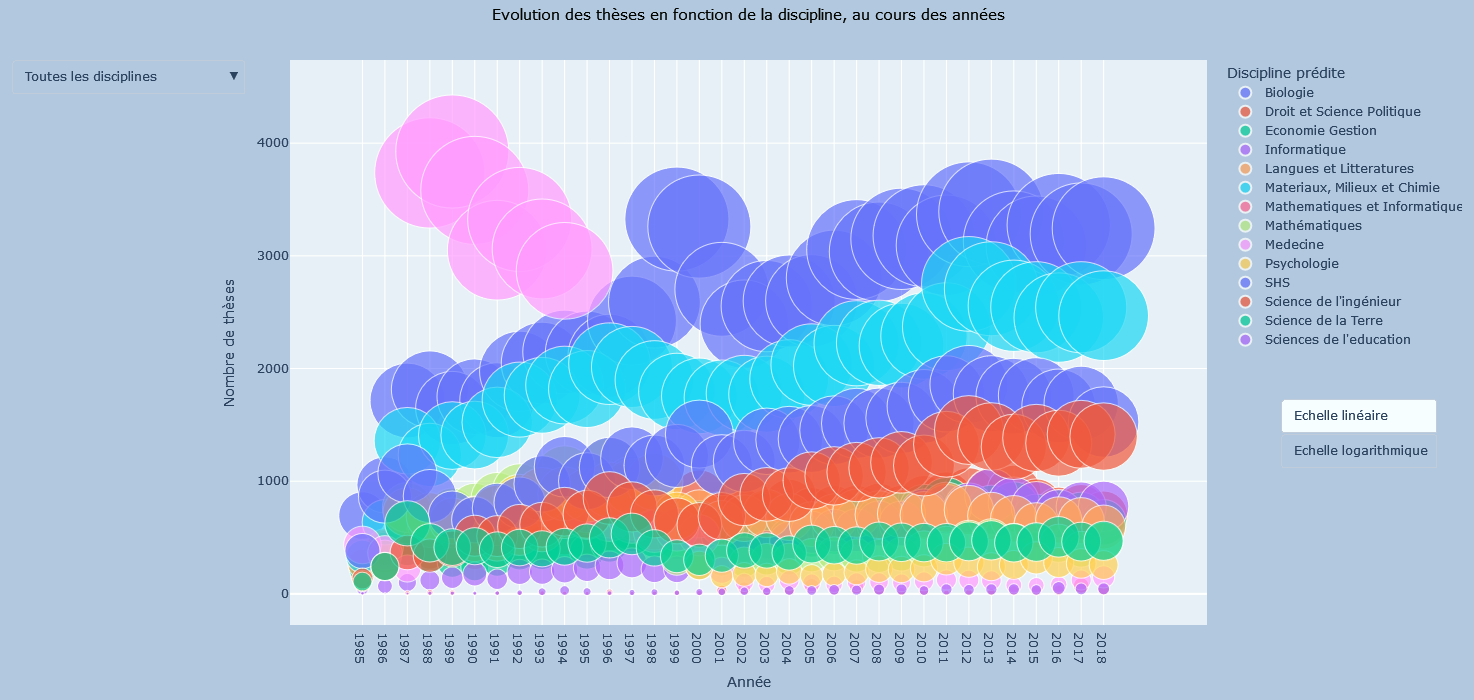

In [63]:
fig3 = px.scatter(
    data_frame=df_theses_1985_2018_ungrouped, y='Nombre de thèses', x='Année',
    color='Discipline prédite', 
    size="Nombre de thèses",  hover_name="Nombre de thèses",
     width=1500, height=700, size_max =80)

#fig.update_layout({ 'yaxis': {'range': [0,4500]}})

fig3.add_annotation(text='Evolution des thèses en fonction de la discipline, au cours des années', 
                    align='center',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.5,
                    y=1.1,
                   font=dict(color="black", size=15),
                    bordercolor='black',
                    borderwidth=0)
fig3.update_layout(margin=dict(l=20, r=20, t=60, b=50),paper_bgcolor="LightSteelBlue")
#fig['layout'].pop("updatemenus")
#fig.update_layout(margin=dict(l=20, r=20, t=40, b=200),paper_bgcolor="LightSteelBlue")
#fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 110)
#fig['layout']['sliders'][0]['pad']=dict(r= 10, t= 110,)



dropdown_butons =[
    {'label' : 'Toutes les disciplines', 'method':'update',
      'args': [ {'visible':[True, True, True, True, True,True,True, True,True,True, True, True, True, True]},{'title': 'Toutes les disciplines'}
              ]
    },
     {'label' : 'Biologie', 'method':'update',
      'args': [ {'visible':[True, False, False, False,False,False,False,False,False,False,False, False,False,False]},{'title': 'Biologie'}
              ]
    },
     {'label' : 'Droit et Science Politique', 'method':'update',
      'args': [ {'visible':[False,True, False, False,False,False,False,False,False,False,False, False,False,False]},{'title': 'Droit et Science Politique'}
              ]
    },
     {'label' : 'Economie Gestion', 'method':'update',
      'args': [ {'visible':[False,False,True, False,False,False,False,False,False,False,False, False,False,False]},{'title': 'Economie Gestion'}
              ]
    },
     {'label' : 'Informatique', 'method':'update',
      'args': [ {'visible':[False,False,False,True,False,False,False,False,False,False,False, False,False,False]},{'title': 'Informatique'}
              ]
    },
     {'label' : 'Langue et Litteratures', 'method':'update',
      'args': [ {'visible':[False,False,False,False,True,False,False,False,False,False,False, False,False,False]},{'title': 'Langue et Litteratures'}
              ]
    },
     {'label' : 'Materiaux, Milieux et Chimie', 'method':'update',
      'args': [ {'visible':[False,False,False,False,False, True,False,False,False,False,False, False,False,False]},{'title': 'Materiaux, Milieux et Chimie'}
              ]
    },
     {'label' : 'Mathematiques et Informatique', 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, True,False,False,False,False, False,False,False]},{'title': 'Mathematiques et Informatique'}
              ]
    },
     {'label' : 'Mathématiques', 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, False,True,False,False,False, False,False,False]},{'title': 'Mathématiques'}
              ]
    },
     {'label' : 'Medecine', 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, False,False,True,False,False, False,False,False]},{'title': 'Medecine'}
              ]
    },
     {'label' : 'Psychologie', 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, False,False,False, True,False, False,False,False]},{'title': 'Psychologie'}
              ]
    },
     {'label' : 'SHS', 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, False,False,False,False, True, False,False,False]},{'title': 'SHS'}
              ]
    },
     {'label' : "Science de l'ingénieur", 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, False,False,False,False, False,True,False,False]},{'title': "Science de l'ingénieur"}
              ]
    },
     {'label' : "Science de la Terre", 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, False,False,False,False, False,False,True,False]},{'title': "Science de la Terre"}
              ]
    },
     {'label' : "Science de l'education", 'method':'update',
      'args': [ {'visible':[False,False,False,False,False,False, False,False,False,False, False,False,False,True]},{'title': "Science de l'education"}
              ]
    }
]



fig3.update_layout({
  'updatemenus':[{
    'type': 'dropdown', 'x':-0.05, 'y': 1, 'showactive': True, 'active':0, 'buttons'  : dropdown_butons
  },
    {
        'type': 'buttons', 'x':1.25, 'y': 0.4,
         'buttons': [{'label': 'Echelle linéaire','method': 'relayout','args': [{'yaxis.type': 'linear'}]},
          {'label': 'Echelle logarithmique', 'method': 'relayout', 'args': [{'yaxis.type': 'log'}]}]
     }
  
  ]

})
    
fig3.show();

--> ajout d'une échelle logarithmique afin de lisser les grandes valeurs et de mieux voir les petites valeurs.

In [64]:
#on sauve le widget
fig3.write_html(r"./widgets/evolution_theses_fct_discpline_année_lineaire_log.html", full_html=False)